<a href="https://colab.research.google.com/github/surajgazi100/Data_science_Fundamentals/blob/main/XML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Python standard library provides a minimal but useful set of interfaces to work with XML. The two most basic and broadly used APIs to XML data are the SAX and DOM interfaces. Simple API for XML (SAX) − Here, you register callbacks for events of interest and then let the parser proceed through the document.

It is important to note that modules in the xml package require that there be at least one SAX-compliant XML parser available. The Expat parser is included with Python, so the xml.parsers.expat module will always be available.



The documentation for the xml.dom and xml.sax packages are the definition of the Python bindings for the DOM and SAX interfaces.



The XML handling submodules are:

xml.etree.ElementTree: the ElementTree API, a simple and lightweight XML processor


xml.dom: the DOM API definition


xml.dom.minidom: a minimal DOM implementation


xml.dom.pulldom: support for building partial DOM trees



xml.sax: SAX2 base classes and convenience functions

xml.parsers.expat: the Expat parser binding

XML vulnerabilities

The XML processing modules are not secure against maliciously constructed data. An attacker can abuse XML features to carry out denial of service attacks, access local files, generate network connections to other machines, or circumvent firewalls.


The following table gives an overview of the known attacks and whether the various modules are vulnerable to them.

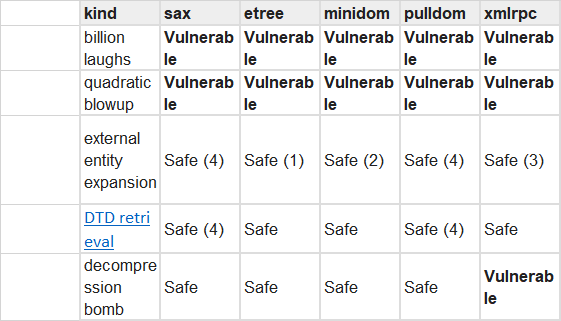

1. xml.etree.ElementTree doesn’t expand external entities and raises a ParserError when an entity occurs.

2. xml.dom.minidom doesn’t expand external entities and simply returns the unexpanded entity verbatim.

3. xmlrpclib doesn’t expand external entities and omits them.

4. Since Python 3.7.1, external general entities are no longer processed by default.

billion laughs / exponential entity expansion

The Billion Laughs attack – also known as exponential entity expansion – uses multiple levels of nested entities. Each entity refers to another entity several times, and the final entity definition contains a small string. The exponential expansion results in several gigabytes of text and consumes lots of memory and CPU time.

quadratic blowup entity expansion
A quadratic blowup attack is similar to a Billion Laughs attack; it abuses entity expansion, too. Instead of nested entities it repeats one large entity with a couple of thousand chars over and over again. The attack isn’t as efficient as the exponential case but it avoids triggering parser countermeasures that forbid deeply-nested entities.

external entity expansion
Entity declarations can contain more than just text for replacement. They can also point to external resources or local files. The XML parser accesses the resource and embeds the content into the XML document.

DTD retrieval
Some XML libraries like Python’s xml.dom.pulldom retrieve document type definitions from remote or local locations. The feature has similar implications as the external entity expansion issue.

decompression bomb
Decompression bombs (aka ZIP bomb) apply to all XML libraries that can parse compressed XML streams such as gzipped HTTP streams or LZMA-compressed files. For an attacker it can reduce the amount of transmitted data by three magnitudes or more.

The documentation for defusedxml on PyPI has further information about all known attack vectors with examples and references.

The defusedxml Package
defusedxml is a pure Python package with modified subclasses of all stdlib XML parsers that prevent any potentially malicious operation. Use of this package is recommended for any server code that parses untrusted XML data. The package also ships with example exploits and extended documentation on more XML exploits such as XPath injection.

In [ ]:
<collection shelf="New Arrivals">
<movie title="Enemy Behind">
   <type>War, Thriller</type>
   <format>DVD</format>
   <year>2003</year>
   <rating>PG</rating>
   <stars>10</stars>
   <description>Talk about a US-Japan war</description>
</movie>
<movie title="Transformers">
   <type>Anime, Science Fiction</type>
   <format>DVD</format>
   <year>1989</year>
   <rating>R</rating>
   <stars>8</stars>
   <description>A schientific fiction</description>
</movie>
   <movie title="Trigun">
   <type>Anime, Action</type>
   <format>DVD</format>
   <episodes>4</episodes>
   <rating>PG</rating>
   <stars>10</stars>
   <description>Vash the Stampede!</description>
</movie>
<movie title="Ishtar">
   <type>Comedy</type>
   <format>VHS</format>
   <rating>PG</rating>
   <stars>2</stars>
   <description>Viewable boredom</description>
</movie>
</collection>

In [ ]:

from xml.dom.minidom import parse
import xml.dom.minidom

# Open XML document using minidom parser
DOMTree = xml.dom.minidom.parse("movies.xml")
collection = DOMTree.documentElement
if collection.hasAttribute("shelf"):
   print "Root element : %s" % collection.getAttribute("shelf")

# Get all the movies in the collection
movies = collection.getElementsByTagName("movie")

# Print detail of each movie.
for movie in movies:
   print "*****Movie*****"
   if movie.hasAttribute("title"):
      print "Title: %s" % movie.getAttribute("title")

   type = movie.getElementsByTagName('type')[0]
   print "Type: %s" % type.childNodes[0].data
   format = movie.getElementsByTagName('format')[0]
   print "Format: %s" % format.childNodes[0].data
   rating = movie.getElementsByTagName('rating')[0]
   print "Rating: %s" % rating.childNodes[0].data
   description = movie.getElementsByTagName('description')[0]
   print "Description: %s" % description.childNodes[0].data

In [ ]:
Root element : New Arrivals
*****Movie*****
Title: Enemy Behind
Type: War, Thriller
Format: DVD
Rating: PG
Description: Talk about a US-Japan war
*****Movie*****
Title: Transformers
Type: Anime, Science Fiction
Format: DVD
Rating: R
Description: A schientific fiction
*****Movie*****
Title: Trigun
Type: Anime, Action
Format: DVD
Rating: PG
Description: Vash the Stampede!
*****Movie*****
Title: Ishtar
Type: Comedy
Format: VHS
Rating: PG
Description: Viewable boredom